In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |  
|`varType`  | =   | `220`            | integer           |        
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer ou `None` |
|`Lay`      | =   | `15`             | integer ou `None` |
|`SingleL`  | =   | `OneL`           | string            |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
# Para uso na Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso em máquina local (neste caso, o diretório remoto deverá ser montado localmente com o comando sshfs)
# Exemplo: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# ou
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# DIRdiag = '/home/radiancia/Versoes-readDiag/readDiag-Old/data'
# DIRdiag = '/home/radiancia/Exp_SMNA/EXP20/gsi/dataout'
#DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'
DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'
# DIRdiag = '/home/radiancia/Exp_SMNA/EXP20/gsi/dataout'

varName = 'amsua' #'uv'
varType = 'n18'   #220
dateIni = '2024021000' 
dateFin = '2024022918' 
nHour = '6'          
vminOMA = -1.0       
vmaxOMA = 1.0        
vminSTD = 0.0        
vmaxSTD = 1.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2024021000', '2024021006', '2024021012', '2024021018', '2024021100', '2024021106', '2024021112', '2024021118', '2024021200', '2024021206', '2024021212', '2024021218', '2024021300', '2024021306', '2024021312', '2024021318', '2024021400', '2024021406', '2024021412', '2024021418', '2024021500', '2024021506', '2024021512', '2024021518', '2024021600', '2024021606', '2024021612', '2024021618', '2024021700', '2024021706', '2024021712', '2024021718', '2024021800', '2024021806', '2024021812', '2024021818', '2024021900', '2024021906', '2024021912', '2024021918', '2024022000', '2024022006', '2024022012', '2024022018', '2024022100', '2024022106', '2024022112', '2024022118', '2024022200', '2024022206', '2024022212', '2024022218', '2024022300', '2024022306', '2024022312', '2024022318', '2024022400', '2024022406', '2024022412', '2024022418', '2024022500', '2024022506', '2024022512', '2024022518', '2024022600', '2024022606', '2024022612', '2024022618', '2024022700', '2024022706', '2024022712', '2024

Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop:

In [3]:
paths, pathsc = [], []

# OuterL = '01'        
# [paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

# OuterLc = '03'
# [pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_amsua_'+ varType +'_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_amsua_'+ varType +'_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021000/diag_amsua_n18_01.2024021000', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021006/diag_amsua_n18_01.2024021006', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021012/diag_amsua_n18_01.2024021012', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021018/diag_amsua_n18_01.2024021018', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021100/diag_amsua_n18_01.2024021100', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021106/diag_amsua_n18_01.2024021106', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021112/diag_amsua_n18_01.2024021112', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021118/diag_amsua_n18_01.2024021118', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021200/diag_amsua_n18_01.2024021200', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021206/diag_amsua_n18_01.2024021206', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021212/diag_amsua_n18_01.2024021212'

### Leitura dos arquivos de diagnósticos

**Nota:** a leitura dos arquivos de diagnóstico seguindo os valores ajustados para os parâmetros acima, requer pelo menos 8GB de memória RAM. Caso seja necessário, ajuste os parâmetros para considerar um intervalo menor.

Lendo os arquivos diagnósticos com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 26 minutos e 40 segundos.

Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021000/diag_amsua_n18_01.2024021000
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021006/diag_amsua_n18_01.2024021006
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021012/diag_amsua_n18_01.2024021012
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021018/diag_amsua_n18_01.2024021018
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021100/diag_amsua_n18_01.2024021100
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021106/diag_amsua_n18_01.2024021106
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021112/diag_amsua_n18_01.2024021112
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024021118/diag_amsua_n18_01.202

Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022712/diag_amsua_n18_01.2024022712
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022718/diag_amsua_n18_01.2024022718
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022800/diag_amsua_n18_01.2024022800
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022806/diag_amsua_n18_01.2024022806
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022812/diag_amsua_n18_01.2024022812
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022818/diag_amsua_n18_01.2024022818
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022900/diag_amsua_n18_01.2024022900
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024022906/diag_amsua_n18_01.2024022906
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/20240229

A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : amsua
              └── kx => n18  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [8]:
gdf_list[tidx].obsInfo

{'amsua':                     lat         lon         elev  nchan      time  iuse  idqc  \
 SatId points                                                                    
 n18   0      -87.693100   16.822300  2709.719482    1.0  2.622500   1.0  51.0   
       1      -87.693100   16.822300  2709.719482    2.0  2.622500   1.0  51.0   
       2      -87.693100   16.822300  2709.719482    3.0  2.622500   1.0  51.0   
       3      -87.693100   16.822300  2709.719482    4.0  2.622500   1.0  51.0   
       4      -87.693100   16.822300  2709.719482    5.0  2.622500  -1.0 -51.0   
 ...                 ...         ...          ...    ...       ...   ...   ...   
       138565  84.159599  338.985596    -6.222843   11.0 -1.653889   1.0   0.0   
       138566  84.159599  338.985596    -6.222843   12.0 -1.653889   1.0   0.0   
       138567  84.159599  338.985596    -6.222843   13.0 -1.653889   1.0   0.0   
       138568  84.159599  338.985596    -6.222843   14.0 -1.653889   4.0   0.0   
       

## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

param= oma tidx= 12


/home/radiancia/My_readDiag/readDiag-issuefix_27/gsidiag/__main__.py:93: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


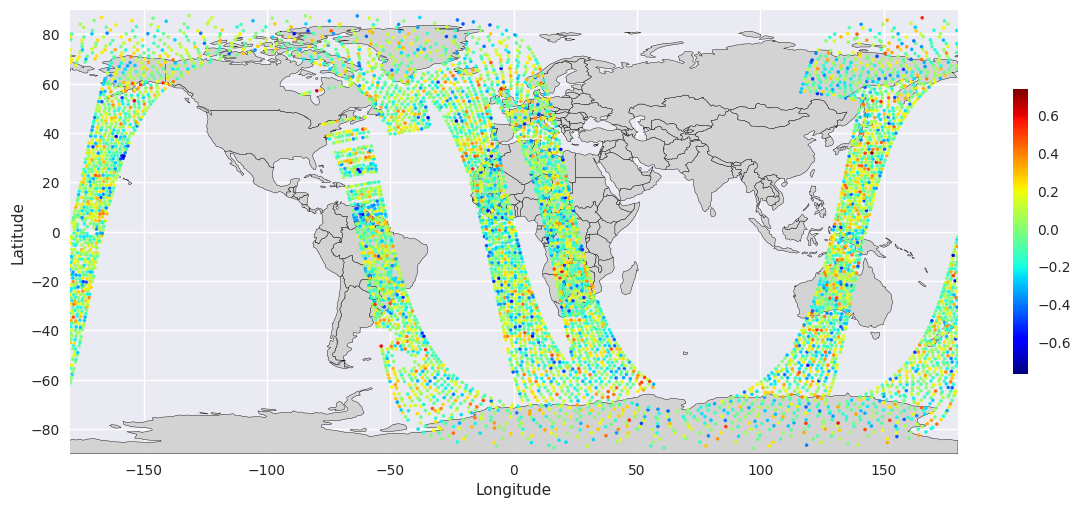

In [20]:
param = 'oma'
tidx = 12  #34  #59
# mask1 = 'iuse == 1'
# mask2 = '(nchan == 14 & iuse == -1)'
# mask2 = '((nchan == 15 & iuse == 1) & idqc == 0)'
mask2 = '((nchan == 7 & iuse == 1) & idqc == 0)'
# mask2 = '((nchan == 6 & iuse == -1) & idqc == 0)'

# df = gdf_list[tidx].obsInfo[varName].query(mask2).loc[varType].oma

# df = df1.query(mask1)

# df1 = gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].idqc

# Range colors: param
# minVal = -1.0000
# maxVal = 1.0000

# minVal = df.min()
# maxVal = df.max()

# Imin = df.idxmin()
# Imax = df.idxmax()

# print('minVal=',minVal,'maxVal=',maxVal)

# print('Imin=',Imin,'Imax=',Imax)

minVal = None
maxVal = None

print('param=', param, 'tidx=', tidx)

# help(gd.plot_diag.plot)

gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param, 
                  minVal=minVal, 
                  maxVal=maxVal, 
                  mask=mask2, 
                  markersize=4.80, 
                  legend='true')

# gd.plot_diag.plot(gdf_list[tidx], 
#                   varName=varName, 
#                   varType=varType, 
#                   param=param,  
#                   mask=mask2, 
#                   legend='true')

figname = varName + '_' + param + '_' + 'tidx' + str(tidx) + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

Para salvar a figura, defina o seu nome (`figname`) e execute os comandos a seguir:

### Série temporal

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função `time_series()`, incluída na classe `plot_diag`. Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. Em seguida são apresentadas figuras alterando os parâmetros `Level`, `Lay` e `SingleL`.

Plotando uma série temporal do OmA e OmF:

varName= amsua varType= n18 nchan= 7

 Variable: amsua  ||  type: n18  ||  Radiance - AMSU-A - NOAA-18.  ||  check: OmF

7 0
 Preparing data for: 2024-02-10:00  - Channel de radiancia:  7
 Preparing data for: 2024-02-10:06  - Channel de radiancia:  7
 Preparing data for: 2024-02-10:12  - Channel de radiancia:  7
 Preparing data for: 2024-02-10:18  - Channel de radiancia:  7
 Preparing data for: 2024-02-11:00  - Channel de radiancia:  7
 Preparing data for: 2024-02-11:06  - Channel de radiancia:  7
 Preparing data for: 2024-02-11:12  - Channel de radiancia:  7
 Preparing data for: 2024-02-11:18  - Channel de radiancia:  7
 Preparing data for: 2024-02-12:00  - Channel de radiancia:  7
 Preparing data for: 2024-02-12:06  - Channel de radiancia:  7
 Preparing data for: 2024-02-12:12  - Channel de radiancia:  7
 Preparing data for: 2024-02-12:18  - Channel de radiancia:  7
 Preparing data for: 2024-02-13:00  - Channel de radiancia:  7
 Preparing data for: 2024-02-13:06  - Channel de radianc

<Figure size 600x400 with 0 Axes>

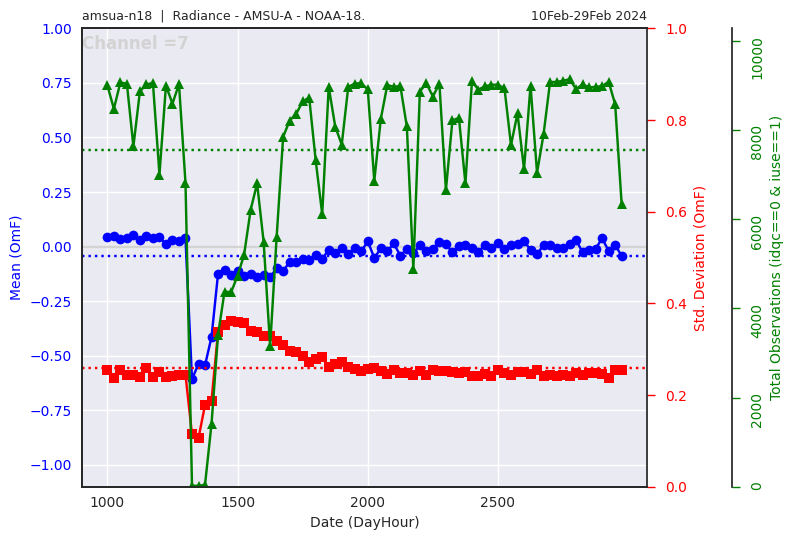

<Figure size 600x400 with 0 Axes>

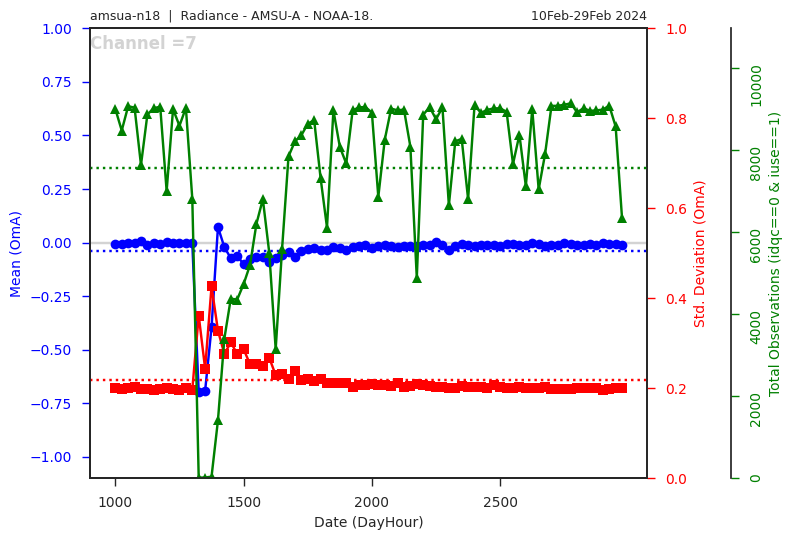

<Figure size 600x400 with 0 Axes>

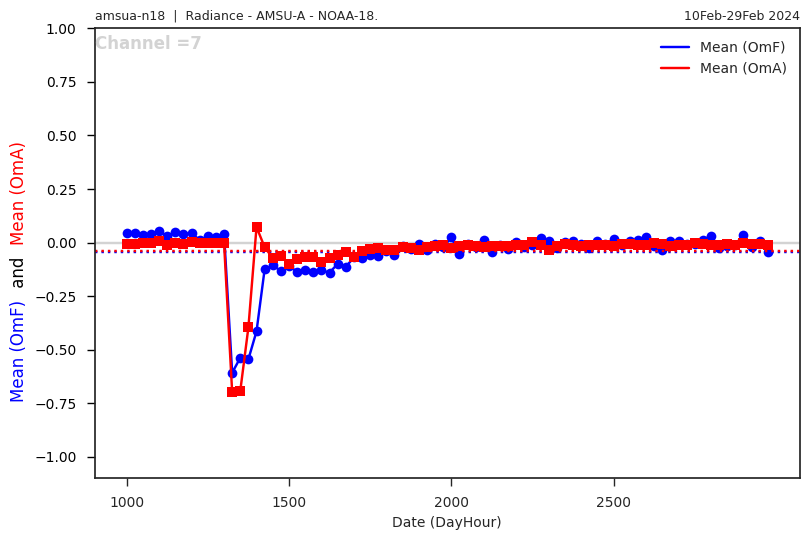

<Figure size 600x400 with 0 Axes>

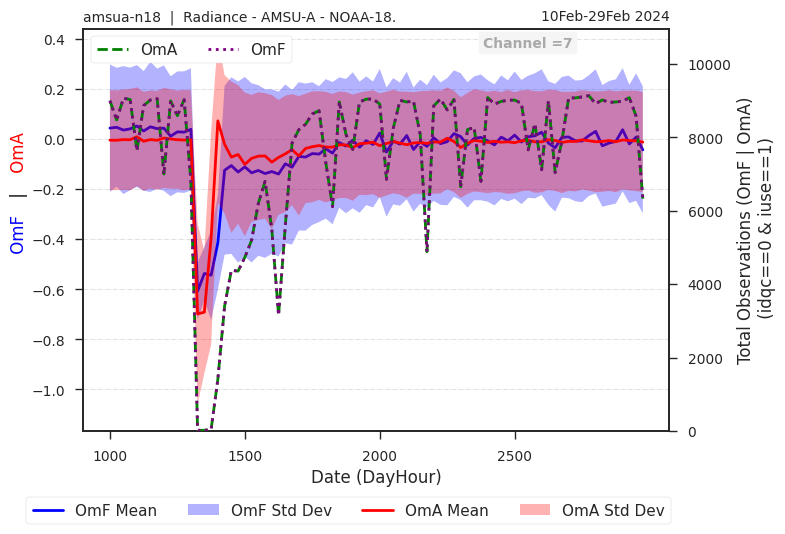

In [10]:
varName = 'amsua'
varType = 'n18'
nchan= 7
print('varName=',varName,'varType=',varType,'nchan=',nchan)

vminOMA = -1
vmaxOMA = 1
vminSTD = 0 
vmaxSTD = 1

gd.plot_diag.time_series_radi(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         mask='idqc==0 & iuse==1', 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         channel=nchan, 
                         Clean=False)

varName= amsua varType= n18 nchan= None Lay= 15

 Variable: amsua  ||  type: n18  ||  Radiance - AMSU-A - NOAA-18.  ||  check: OmF

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 0
 Preparing data for: Canais de radiancia2024-02-10:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-10:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-10:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-10:18
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-11:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-11:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-11:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

 Preparing data for: Canais de radiancia2024-02-27:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-27:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-27:18
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-28:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-28:06
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-28:12
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-28:18
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-29:00
 Channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: Canais de radiancia2024-02-

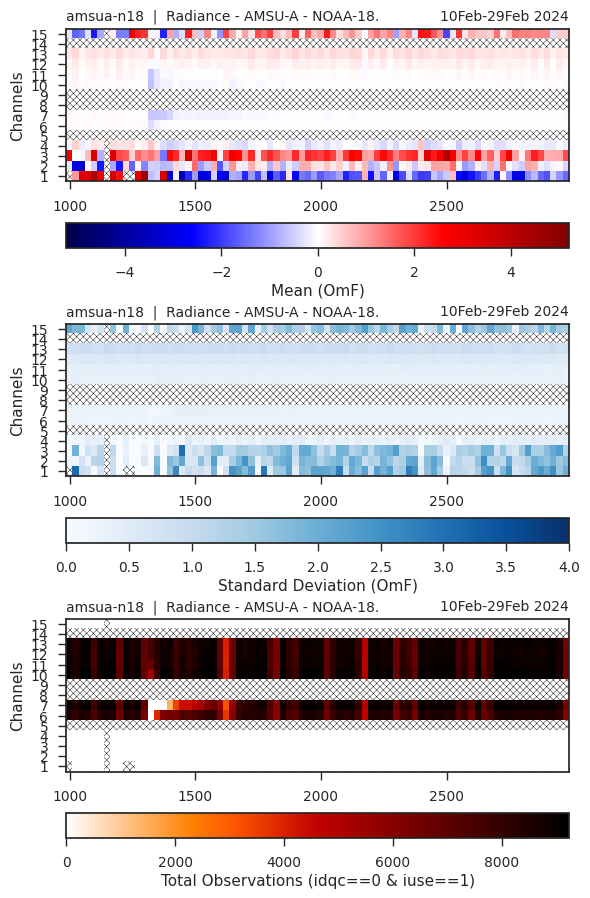

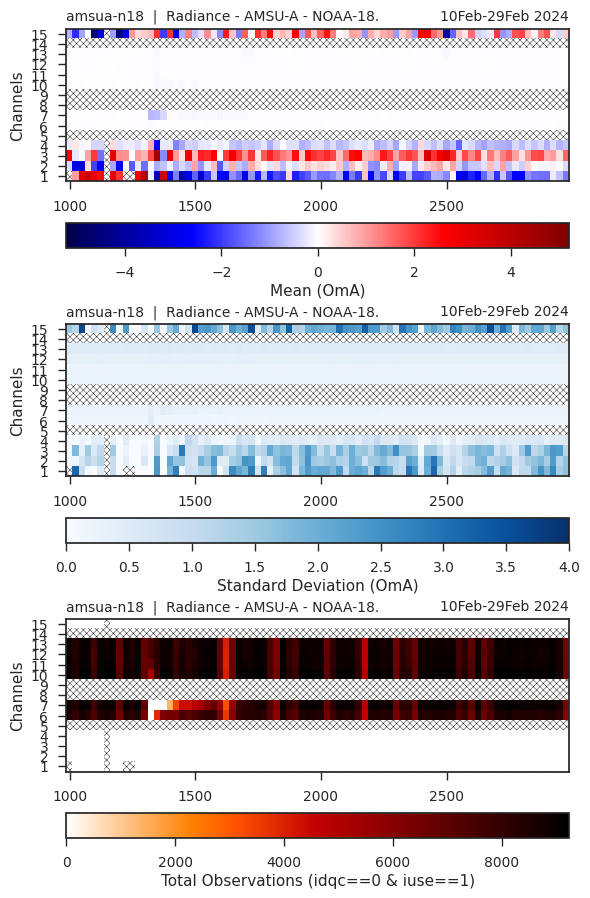

In [11]:
varName = 'amsua'
varType = 'n18'
# nchan=[4,5,7,8,9,10,11,12,13,14]
# nchan=[7,8,9,10,12,13]
# nchan=[12,13,14,15]
# nchan=[1,2,3,4,5,15]
nchan = None

# dateIni='2024021200' 
# dateFin='2024021518' 

vminOMA = None
vmaxOMA = None
vminSTD = None 
vmaxSTD = None 
print('varName=',varName,'varType=',varType,'nchan=',nchan,'Lay=',Lay)

gd.plot_diag.time_series_radi(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         mask='idqc==0 & iuse==1', 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         channel=nchan, 
                         Clean=False)

In [12]:
# varName = 'amsua'
# varType = 'n15'
# # zlevs_def = list(map(int,gdf_list[0].nchan))
# # zlevs_def = gdf_list[0].iuse
# # zlevs_def = gdf_list[0].obsInfo[varName].loc[varType].nchan
# zlevs_def = list(map(int,gdf_list[0].obsInfo[varName].loc[varType].nchan.unique()))
# # zlevs_def = list(map(int,gdf_list[0].zlevs))
# print(zlevs_def)

In [13]:
# print(OneL)